In [1]:
import pandas as pd
import sklearn
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

train = pd.read_csv("dataset_train_set.csv")
test = pd.read_csv("dataset_dev_set.csv")

In [2]:
X_train = train.drop('target',axis=1)
y_train = train['target']
X_test = test.drop('target',axis=1)
y_test = test['target']

In [3]:
X_train.head()

,hPos,hGSPG,hGCPG,hCSPG,hPtsPG,aPos,aGSPG,aGCPG,aCSPG,aPtsPG
0,1.0,0.0,0.0,0.0,0.0,14.0,0.0,0.0,0.0,0.0
1,4.0,0.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0
2,5.0,0.0,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0
3,6.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,19.0,0.0,0.0,0.0,0.0


In [4]:
X_train = tf.keras.utils.normalize(X_train.values,axis=1)
X_test = tf.keras.utils.normalize(X_test.values,axis=1)

In [14]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()

bnb.fit(X_train,y_train)
y_pred = bnb.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.45087719298245615


In [15]:
correct_pred_dict = {0:0,1:0,2:0}
for i in range(len(y_pred)):
    pred = y_pred[i]
    real = y_test[i]
    if pred == real:
        correct_pred_dict[pred] += 1
correct_pred_dict

{0: 27, 1: 0, 2: 1001}

In [16]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)
y_pred = gnb.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.4855263157894737


In [17]:
correct_pred_dict = {0:0,1:0,2:0}
for i in range(len(y_pred)):
    pred = y_pred[i]
    real = y_test[i]
    if pred == real:
        correct_pred_dict[pred] += 1
correct_pred_dict

{0: 326, 1: 28, 2: 753}

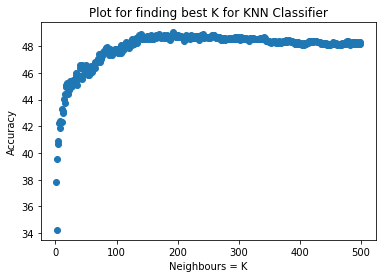

In [19]:
from sklearn.neighbors import KNeighborsClassifier
ks = [x for x in range(1,500)]
subset_accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    subset_accuracies.append(knn.score(X_test,y_test)*100)
plt.scatter(ks,subset_accuracies)
plt.xlabel("Neighbours = K")
plt.ylabel("Accuracy")
plt.title("Plot for finding best K for KNN Classifier")
plt.show()

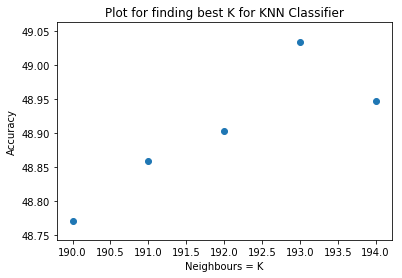

In [22]:
from sklearn.neighbors import KNeighborsClassifier
ks = [x for x in range(190,195)]
subset_accuracies = []
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    subset_accuracies.append(knn.score(X_test,y_test)*100)
import matplotlib.pyplot as plt
plt.scatter(ks,subset_accuracies)
plt.xlabel("Neighbours = K")
plt.ylabel("Accuracy")
plt.title("Plot for finding best K for KNN Classifier")
plt.show()

In [23]:
knn = KNeighborsClassifier(n_neighbors=193)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_pred)))

Accuracy: 0.4903508771929825


In [24]:
correct_pred_dict = {0:0,1:0,2:0}
for i in range(len(y_pred)):
    pred = y_pred[i]
    real = y_test[i]
    if pred == real:
        correct_pred_dict[pred] += 1
correct_pred_dict

{0: 180, 1: 6, 2: 932}

In [26]:
pd.Series(list(y_pred)).value_counts()

2    1899
0     368
1      13
dtype: int64

In [30]:
from collections import Counter
Counter(list(y_pred))

Counter({2: 1899, 0: 368, 1: 13})

In [31]:
knn2 = KNeighborsClassifier(n_neighbors=193,weights='distance')
knn2.fit(X_train,y_train)
y_pred2 = knn2.predict(X_test)
print("Accuracy: {}".format(accuracy_score(y_test,y_pred2)))

Accuracy: 0.48333333333333334


In [32]:
pd.Series(list(y_pred2)).value_counts()

2    1869
0     387
1      24
dtype: int64